In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load The dataset

In [4]:
df = pd.read_csv('titanic.csv')  # Adjust filename if needed

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)



Dataset Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [5]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Basic statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.20420

In [7]:
# Create a copy for analysis
data = df.copy()

# Check survival distribution

print("SURVIVAL DISTRIBUTION")
print("="*50)
print(data['Survived'].value_counts())
print(f"Survival rate: {data['Survived'].mean():.2%}")

SURVIVAL DISTRIBUTION
Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 38.38%


In [8]:
#3. NUMERICAL FEATURES ANALYSIS

In [9]:
print("\n" + "="*50)
print("NUMERICAL FEATURES COMPARISON WITH SURVIVAL")
print("="*50)

# Select numerical columns (exclude Survived and PassengerId)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Survived', 'PassengerId']]

# Statistical comparison for each numerical feature
for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    
    # Split by survival
    survived = data[data['Survived'] == 1][col].dropna()
    died = data[data['Survived'] == 0][col].dropna()
    
    # Statistics
    print(f"Mean (Survived): {survived.mean():.2f}")
    print(f"Mean (Died): {died.mean():.2f}")
    print(f"Median (Survived): {survived.median():.2f}")
    print(f"Median (Died): {died.median():.2f}")
    
    # T-test to check if difference is significant
    t_stat, p_value = stats.ttest_ind(survived, died)
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("✓ SIGNIFICANT difference (p < 0.05)")
    else:
        print("✗ NOT significant (p >= 0.05)")


NUMERICAL FEATURES COMPARISON WITH SURVIVAL

PCLASS:
----------------------------------------
Mean (Survived): 1.95
Mean (Died): 2.53
Median (Survived): 2.00
Median (Died): 3.00
T-statistic: -10.7253
P-value: 0.0000
✓ SIGNIFICANT difference (p < 0.05)

AGE:
----------------------------------------
Mean (Survived): 28.34
Mean (Died): 30.63
Median (Survived): 28.00
Median (Died): 28.00
T-statistic: -2.0667
P-value: 0.0391
✓ SIGNIFICANT difference (p < 0.05)

SIBSP:
----------------------------------------
Mean (Survived): 0.47
Mean (Died): 0.55
Median (Survived): 0.00
Median (Died): 0.00
T-statistic: -1.0538
P-value: 0.2922
✗ NOT significant (p >= 0.05)

PARCH:
----------------------------------------
Mean (Survived): 0.46
Mean (Died): 0.33
Median (Survived): 0.00
Median (Died): 0.00
T-statistic: 2.4420
P-value: 0.0148
✓ SIGNIFICANT difference (p < 0.05)

FARE:
----------------------------------------
Mean (Survived): 48.40
Mean (Died): 22.12
Median (Survived): 26.00
Median (Died): 10.5

In [10]:
# 4. CATEGORICAL FEATURES ANALYSIS
# ============================================================

print("\n" + "="*50)
print("CATEGORICAL FEATURES COMPARISON WITH SURVIVAL")
print("="*50)

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols += ['Pclass']  # Include Pclass if present

for col in categorical_cols:
    if col in data.columns:
        print(f"\n{col.upper()}:")
        print("-" * 40)
        
        # Crosstab
        ct = pd.crosstab(data[col], data['Survived'], normalize='index') * 100
        print(ct.round(2))
        
        # Chi-square test
        chi2, p_value, dof, expected = stats.chi2_contingency(
            pd.crosstab(data[col], data['Survived'])
        )
        print(f"\nChi-square statistic: {chi2:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("✓ SIGNIFICANT association (p < 0.05)")
        else:
            print("✗ NOT significant (p >= 0.05)")


CATEGORICAL FEATURES COMPARISON WITH SURVIVAL

NAME:
----------------------------------------
Survived                                   0      1
Name                                               
Abbing, Mr. Anthony                    100.0    0.0
Abbott, Mr. Rossmore Edward            100.0    0.0
Abbott, Mrs. Stanton (Rosa Hunt)         0.0  100.0
Abelson, Mr. Samuel                    100.0    0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    0.0  100.0
...                                      ...    ...
de Mulder, Mr. Theodore                  0.0  100.0
de Pelsmaeker, Mr. Alfons              100.0    0.0
del Carlo, Mr. Sebastiano              100.0    0.0
van Billiard, Mr. Austin Blyler        100.0    0.0
van Melkebeke, Mr. Philemon            100.0    0.0

[891 rows x 2 columns]

Chi-square statistic: 891.0000
P-value: 0.4842
✗ NOT significant (p >= 0.05)

SEX:
----------------------------------------
Survived      0      1
Sex                   
female    25.80  74.20
male      8

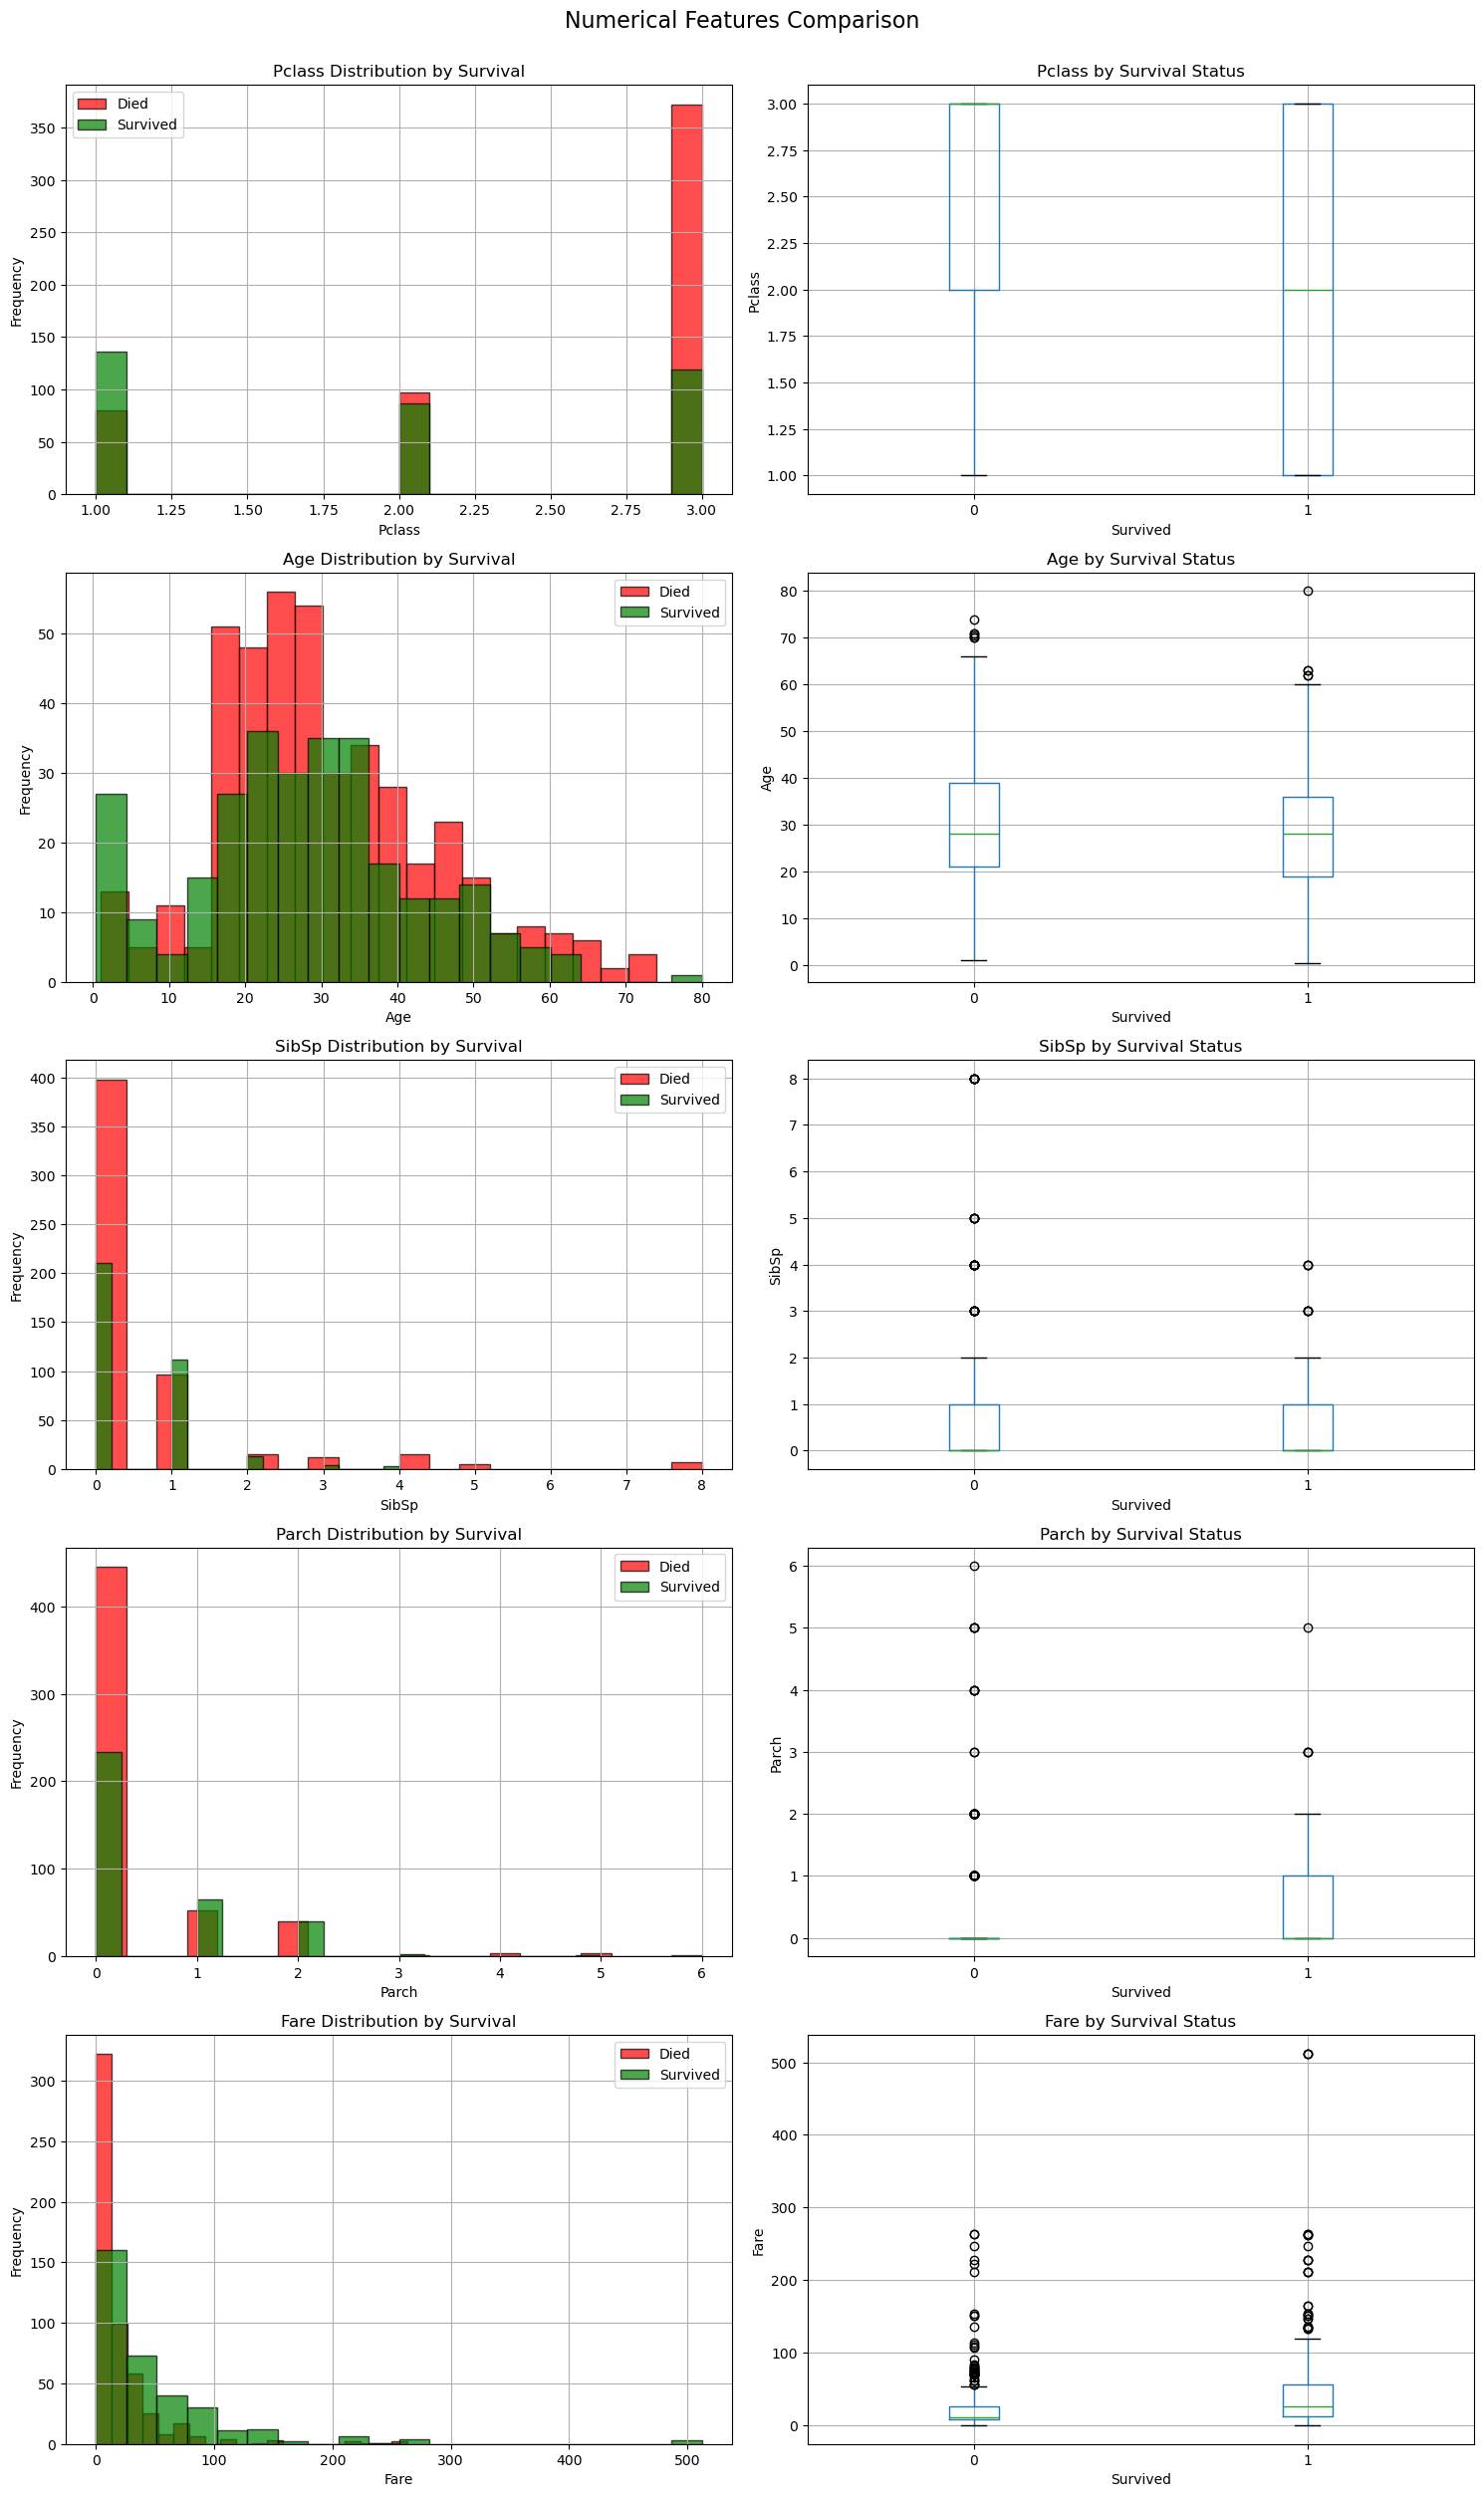

In [11]:
# 5. VISUALIZATION - NUMERICAL FEATURES
# ============================================================

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 5*len(numerical_cols)))
if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    # Histogram by survival
    data[data['Survived']==0][col].hist(ax=axes[idx,0], bins=20, alpha=0.7, 
                                         label='Died', color='red', edgecolor='black')
    data[data['Survived']==1][col].hist(ax=axes[idx,0], bins=20, alpha=0.7, 
                                         label='Survived', color='green', edgecolor='black')
    axes[idx,0].set_xlabel(col)
    axes[idx,0].set_ylabel('Frequency')
    axes[idx,0].set_title(f'{col} Distribution by Survival')
    axes[idx,0].legend()
    
    # Box plot by survival
    data.boxplot(column=col, by='Survived', ax=axes[idx,1])
    axes[idx,1].set_xlabel('Survived')
    axes[idx,1].set_ylabel(col)
    axes[idx,1].set_title(f'{col} by Survival Status')

plt.suptitle('Numerical Features Comparison', y=1.001, fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\DT\AppData\Local\Temp\ipykernel_8320\410032516.py:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


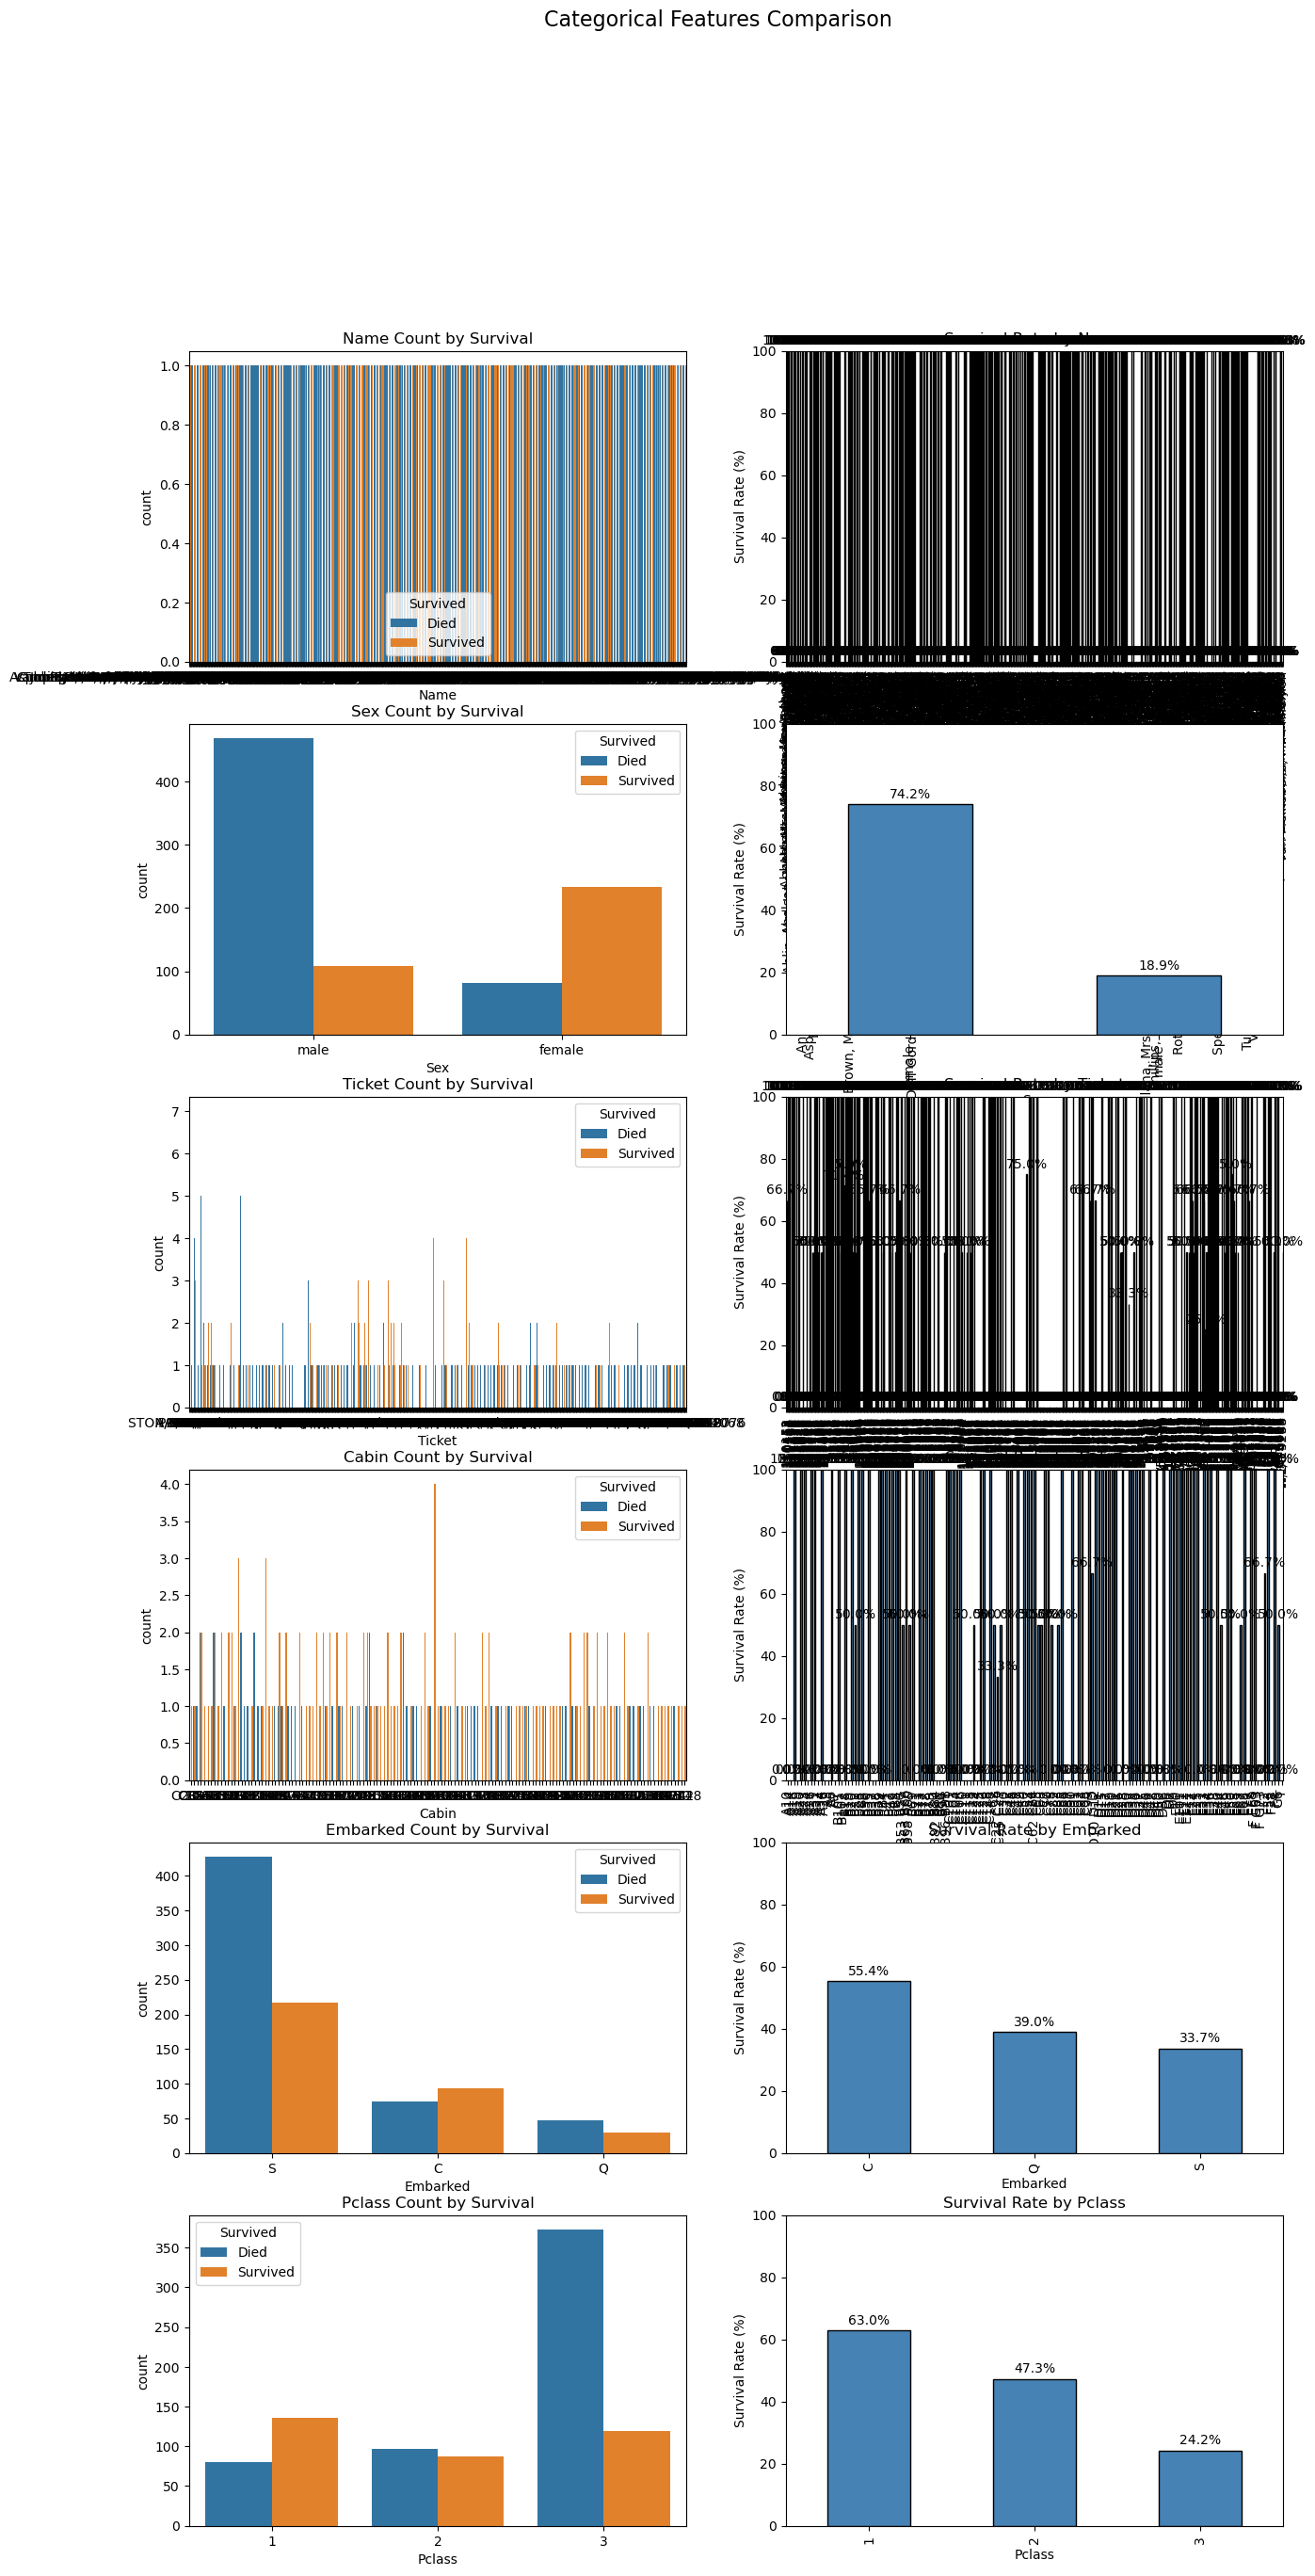

In [12]:
# 6. VISUALIZATION - CATEGORICAL FEATURES
# ============================================================

fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(15, 5*len(categorical_cols)))
if len(categorical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(categorical_cols):
    if col in data.columns:
        # Count plot
        sns.countplot(data=data, x=col, hue='Survived', ax=axes[idx,0])
        axes[idx,0].set_title(f'{col} Count by Survival')
        axes[idx,0].legend(title='Survived', labels=['Died', 'Survived'])
        
        # Survival rate by category
        survival_rate = data.groupby(col)['Survived'].mean() * 100
        survival_rate.plot(kind='bar', ax=axes[idx,1], color='steelblue', edgecolor='black')
        axes[idx,1].set_ylabel('Survival Rate (%)')
        axes[idx,1].set_title(f'Survival Rate by {col}')
        axes[idx,1].set_ylim([0, 100])
        
        # Add value labels
        for i, v in enumerate(survival_rate):
            axes[idx,1].text(i, v + 2, f'{v:.1f}%', ha='center')

plt.suptitle('Categorical Features Comparison', y=1.001, fontsize=16)
plt.tight_layout()
plt.show()


CORRELATION WITH SURVIVAL
Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.077221
Pclass   -0.338481
Name: Survived, dtype: float64


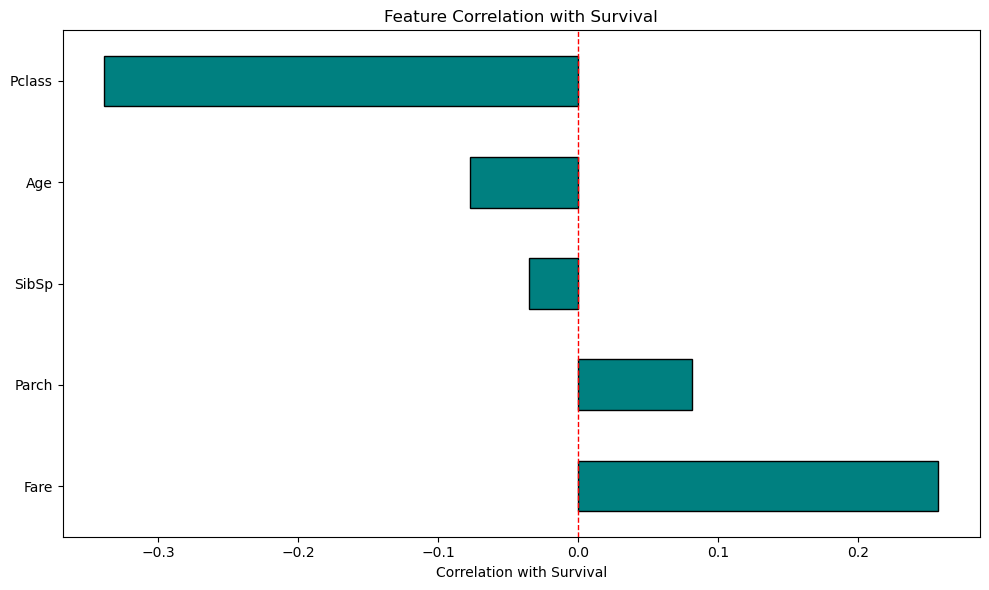

In [13]:
# 7. CORRELATION ANALYSIS
# ============================================================

print("\n" + "="*50)
print("CORRELATION WITH SURVIVAL")
print("="*50)

# Calculate correlations
correlations = data[numerical_cols + ['Survived']].corr()['Survived'].drop('Survived').sort_values(ascending=False)
print(correlations)

# Visualize correlation
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Correlation with Survival')
plt.title('Feature Correlation with Survival')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [14]:
# 8. SUMMARY - MOST IMPORTANT FEATURES
# ============================================================

print("\n" + "="*50)
print("FEATURE IMPORTANCE SUMMARY")
print("="*50)

# Combine results
importance_summary = []

# Numerical features
for col in numerical_cols:
    survived = data[data['Survived'] == 1][col].dropna()
    died = data[data['Survived'] == 0][col].dropna()
    t_stat, p_value = stats.ttest_ind(survived, died)
    corr = correlations[col] if col in correlations.index else 0
    
    importance_summary.append({
        'Feature': col,
        'Type': 'Numerical',
        'P-value': p_value,
        'Correlation': abs(corr),
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

# Categorical features
for col in categorical_cols:
    if col in data.columns:
        chi2, p_value, dof, expected = stats.chi2_contingency(
            pd.crosstab(data[col], data['Survived'])
        )
        
        importance_summary.append({
            'Feature': col,
            'Type': 'Categorical',
            'P-value': p_value,
            'Correlation': chi2 / len(data),  # Normalized chi-square
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })


FEATURE IMPORTANCE SUMMARY
